In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Normalized_Data.csv')

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_9980/2043923742.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Normalized_Data.csv')


In [4]:
psy=pd.read_csv('Psychometric_Data.csv')

In [5]:
psy=pd.get_dummies(psy, columns=['Gender'])

In [6]:
# station=df[df['Trip'].isnull()]
# station2 = station[station['BPM'].notna()]
# df_12=station2[station2['P_ID']=='P12']
# df_13=station2[station2['P_ID']=='P13']
# df_15=station2[station2['P_ID']=='P15']
# df_17=station2[station2['P_ID']=='P17']
# df_18=station2[station2['P_ID']=='P18']
# df_19=station2[station2['P_ID']=='P19']
# df_20=station2[station2['P_ID']=='P20']
# df_22=station2[station2['P_ID']=='P22']
# df_23=station2[station2['P_ID']=='P23']
# df_24=station2[station2['P_ID']=='P24']
# df_27=station2[station2['P_ID']=='P27']
# df_29=station2[station2['P_ID']=='P29']

# arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27, df_29]
# new_arr=[]

# for elem in arr:
#     avg=elem['BPM'].mean()
#     new_arr.append(avg)
# new_df=pd.DataFrame()
# new_df['P_ID']=['P12','P13','P15','P17','P18','P19','P20','P22','P23','P24','P27','P29']
# new_df['Averages']=new_arr

In [7]:
df_2=df.drop(['Time', 'latitudes', 'longitudes', 'Time_Second', 'BPM'], axis=1)
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_9980/1439633169.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [8]:
# df_12=df_2[df_2['P_ID']=='P12']
# df_13=df_2[df_2['P_ID']=='P13']
# df_15=df_2[df_2['P_ID']=='P15']
# df_17=df_2[df_2['P_ID']=='P17']
# df_18=df_2[df_2['P_ID']=='P18']
# df_19=df_2[df_2['P_ID']=='P19']
# df_20=df_2[df_2['P_ID']=='P20']
# df_22=df_2[df_2['P_ID']=='P22']
# df_23=df_2[df_2['P_ID']=='P23']
# df_24=df_2[df_2['P_ID']=='P24']
# df_27=df_2[df_2['P_ID']=='P27']
# df_29=df_2[df_2['P_ID']=='P29']

# arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_29]
# counter=0
# for elem in arr:
#     elem['BPM']=elem['BPM']-new_arr[counter]
#     counter+=1
    
# df_new=pd.concat([df_12, df_13, df_15, df_17, df_18, df_19, df_20, df_22, df_23, df_24, df_29])

# # df_2=df_new.drop('P_ID', axis=1)
# df_2=df_new

In [9]:
df_2=pd.merge(df_2, psy, on='P_ID')

In [10]:
df_2.drop('P_ID', axis=1, inplace=True)

In [11]:
df_2=df_2.dropna(axis=0)

In [12]:
df_2=pd.get_dummies(df_2, columns=['Day'])

In [13]:
df_2.drop(['Day_Day1', 'Day_Day2', 'Day_Day3', 'Day_Day4', 'Day_Day5', 'Day_Day6', 'Day_Day7'], axis=1, inplace=True)

In [14]:
df_2.drop(['Trip','Driving'], axis=1, inplace=True)

In [15]:
df_2['Des_Weather_Info'].unique()

array(['Clouds', 'Clear', 'Thunderstorm'], dtype=object)

In [16]:
df_2['Src_Weather_Info'].replace(['Clear', 'Clouds','Drizzle','Haze','Thunderstorm'],
                        [0, 1,2,3,4], inplace=True)

In [17]:
df_2['Des_Weather_Info'].replace(['Clear','Clouds','Thunderstorm'],[0,1,2], inplace=True)

In [18]:
df_2=pd.get_dummies(df_2, columns=['Week_Weekend'])

In [19]:
df_2.rename(columns={"Week_Weekend_WeekDays": "Weekday", "Week_Weekend_WeekEnd": "Weekend"}, inplace=True)

In [20]:
df_2

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,Des_Weather_Info,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
8906,20.500000,16.900000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8911,9.500000,20.000000,28.9,1.43925,25.85,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8912,22.000000,16.600000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8920,0.333333,16.900000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8933,3.333333,17.300000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943464,15.333333,16.866667,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943469,20.000000,11.000000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943473,15.000000,10.350000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943479,4.500000,14.050000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1


In [21]:
df_2.loc[8906]

Speed_MPH              20.500000
ATP                    16.900000
BP_Hg                  28.900000
JF                      1.707380
FF                     24.790000
Src_Temperature        84.040000
Src_Pressure         1014.000000
Src_WindSpeed          10.360000
Src_Weather_Info        1.000000
Des_Weather_Info        1.000000
NR_HR                  15.620144
Age                    27.000000
Trait_Anxiety          45.000000
Extraversion            8.000000
Agreeableness           9.000000
Conscientiousness       9.000000
Neuroticism             8.000000
Openness                6.000000
Gender_Female           1.000000
Gender_Male             0.000000
Weekday                 1.000000
Weekend                 0.000000
Name: 8906, dtype: float64

## Predict BPM difference

In [22]:
temp=df_2['NR_HR']
df_3=df_2.drop(['NR_HR'], axis=1)
Y=temp.values
X=df_2.values

In [23]:
df_3

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,Des_Weather_Info,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
8906,20.500000,16.900000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8911,9.500000,20.000000,28.9,1.43925,25.85,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8912,22.000000,16.600000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8920,0.333333,16.900000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8933,3.333333,17.300000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943464,15.333333,16.866667,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943469,20.000000,11.000000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943473,15.000000,10.350000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943479,4.500000,14.050000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1


In [24]:
from sklearn import ensemble

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
from sklearn.model_selection import KFold

In [27]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [28]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_3.iloc[train_index],df_3.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [29]:
# gb = GradientBoostingRegressor(learning_rate=0.1)

In [30]:
# gb.fit(X_train,y_train)

In [31]:
# gb.score(X_test, y_test)

In [32]:
# print(gb.feature_importances_)

In [33]:
# X_train.keys()

In [34]:
from matplotlib.pyplot import figure

In [35]:
# feature_importance = gb.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf=RandomForestRegressor()

In [101]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
rf.score(X_test, y_test)

0.867588480828128

In [103]:
print(rf.feature_importances_)

[0.06307091 0.05335471 0.02736872 0.04030089 0.04171549 0.10977917
 0.04182587 0.16919249 0.01617372 0.01894211 0.00097428 0.24607426
 0.01361245 0.1234372  0.00879722 0.00762097 0.00161522 0.00028167
 0.00114309 0.00386484 0.01085471]


[17 10 18 16 19 15 14 20 12  8  9  2  3  4  6  1  0  5 13  7 11]


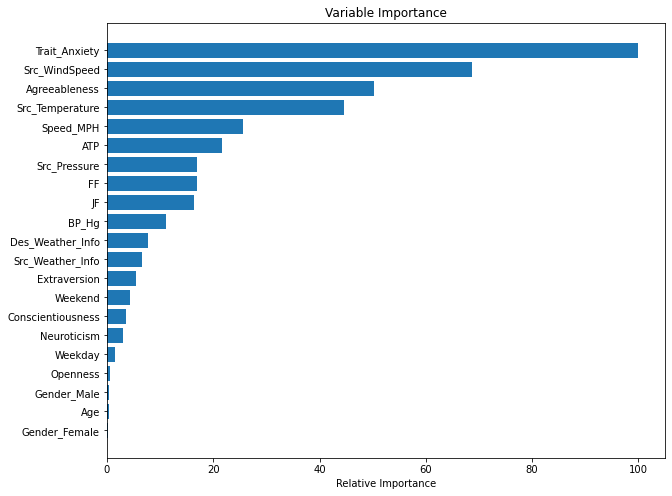

In [104]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [42]:
from sklearn.ensemble import AdaBoostRegressor

In [43]:
# ab=AdaBoostRegressor(loss='exponential', n_estimators=25)

In [44]:
# ab.fit(X_train,y_train)

In [45]:
# ab.score(X_test, y_test)

In [46]:
# feature_importance = ab.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# dt=DecisionTreeRegressor()

In [49]:
# dt.fit(X_train,y_train)

In [50]:
# dt.score(X_test, y_test)

In [51]:
# feature_importance = dt.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
# en=ElasticNet(alpha=0.1)

In [54]:
# en.fit(X_train, y_train)

In [55]:
# en.score(X_test,y_test)

In [56]:
# feature_importance = pd.Series(index = X_train.columns, data = np.abs(en.coef_))

# n_selected_features = (feature_importance>0).sum()
# print('{0:d} features, reduction of {1:2.2f}%'.format(
#     n_selected_features,(1-n_selected_features/len(feature_importance))*100))

# feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

In [57]:
from sklearn.ensemble import VotingRegressor

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [60]:
import xgboost as xgb

In [61]:
# bst=xgb.train(X_train.values, y_train.values)

In [62]:
# xgb.fit(X_train,y_train)

In [63]:
# xgb.score(X_test, y_test)

In [66]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [76]:
def get_models():
    models = list()
    #models.append(('ht', HistGradientBoostingRegressor()))
    models.append(('gb', GradientBoostingRegressor()))
    models.append(('ab', AdaBoostRegressor()))
    models.append(('rf', RandomForestRegressor()))
    return models

In [77]:
from sklearn.metrics import accuracy_score
def evaluate(models, X_train, X_test, y_train, y_test):
    scores = list()
    for name, model in models:
        model.fit(X_train, y_train)
        score=model.score(X_test,y_test)
        scores.append(score)
    return scores

In [78]:
models=get_models()

In [79]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [80]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [81]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.7046953116823458, 0.39166880666449766,
                         0.8612006075406482])

In [82]:
ensemble.score(X_test, y_test)

0.8016999542150478

In [83]:
def feature_importance(ensemble, weights):
    feature_importance = dict()
    for est in ensemble.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [84]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)

,Feature,Importance
11,Trait_Anxiety,0.373533
7,Src_WindSpeed,0.343151
13,Agreeableness,0.262135
5,Src_Temperature,0.220092
6,Src_Pressure,0.108538
0,Speed_MPH,0.084738
15,Neuroticism,0.080887
1,ATP,0.079410
2,BP_Hg,0.070801
4,FF,0.063313


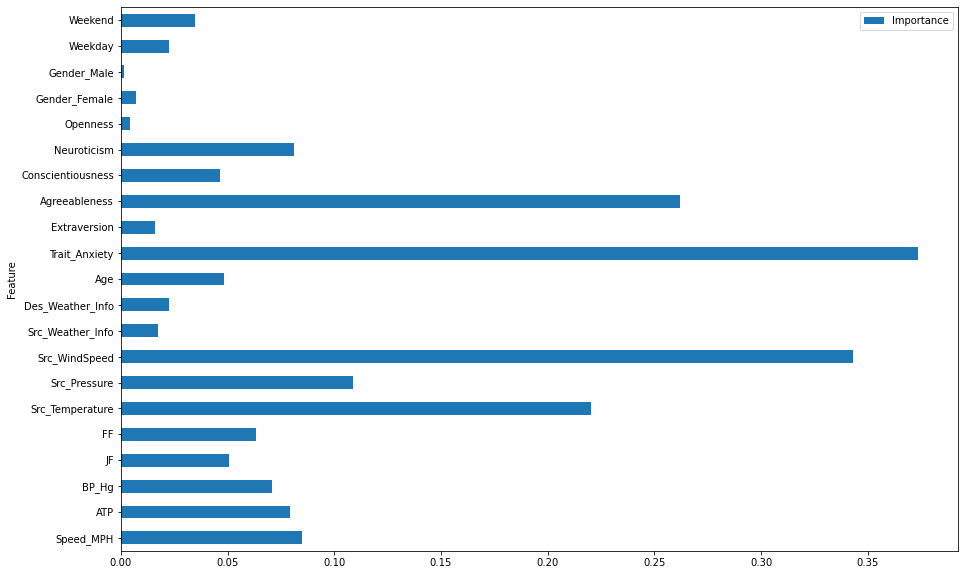

In [85]:
ax = final_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [86]:
df_3=df_2.drop(['Speed_MPH'],axis=1)

In [87]:
df_3.corr()['NR_HR'].sort_values()

Gender_Female       -0.303692
Weekend             -0.256638
Agreeableness       -0.224427
Age                 -0.188269
Trait_Anxiety       -0.136611
ATP                 -0.127317
Extraversion        -0.111814
JF                  -0.109724
Neuroticism         -0.044465
Src_Weather_Info    -0.011346
BP_Hg                0.008245
FF                   0.030121
Conscientiousness    0.043419
Openness             0.081442
Src_Pressure         0.082310
Src_Temperature      0.093786
Des_Weather_Info     0.097970
Src_WindSpeed        0.210318
Weekday              0.256638
Gender_Male          0.303692
NR_HR                1.000000
Name: NR_HR, dtype: float64

In [88]:
df_2

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,Des_Weather_Info,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
8906,20.500000,16.900000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8911,9.500000,20.000000,28.9,1.43925,25.85,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8912,22.000000,16.600000,28.9,1.70738,24.79,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8920,0.333333,16.900000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
8933,3.333333,17.300000,28.9,2.42528,28.40,84.04,1014.0,10.36,1,1,...,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943464,15.333333,16.866667,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943469,20.000000,11.000000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943473,15.000000,10.350000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1
1943479,4.500000,14.050000,29.5,0.00000,45.61,93.45,1017.0,10.36,1,1,...,32,9,7,9,4,7,0,1,0,1


As we can see, wind speed, pressure, and temperature are the best predictors of BPM according to the models. Wind speed and pressure are plausible, but temperature seems a little weird. 

No notable difference between when BPM is subtracted or divided, as suspected. 

# Normalizing the Data to check if anything changes

In [89]:
normalized_df=(df_2-df_2.min())/(df_2.max()-df_2.min())

In [90]:
temp=normalized_df['NR_HR']
df_5=normalized_df.drop(['NR_HR'], axis=1)
Y=temp.values
X=normalized_df.values

In [91]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_5.iloc[train_index],df_5.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [92]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [93]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [94]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [95]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.7046999598693597, 0.4197412606056873,
                         0.8616490544714693])

In [96]:
ensemble.score(X_test, y_test)

0.799699685968835

In [97]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)

,Feature,Importance
11,Trait_Anxiety,0.396205
7,Src_WindSpeed,0.347014
13,Agreeableness,0.264490
5,Src_Temperature,0.214066
6,Src_Pressure,0.123888
0,Speed_MPH,0.085398
1,ATP,0.078412
2,BP_Hg,0.070644
4,FF,0.066828
10,Age,0.052063


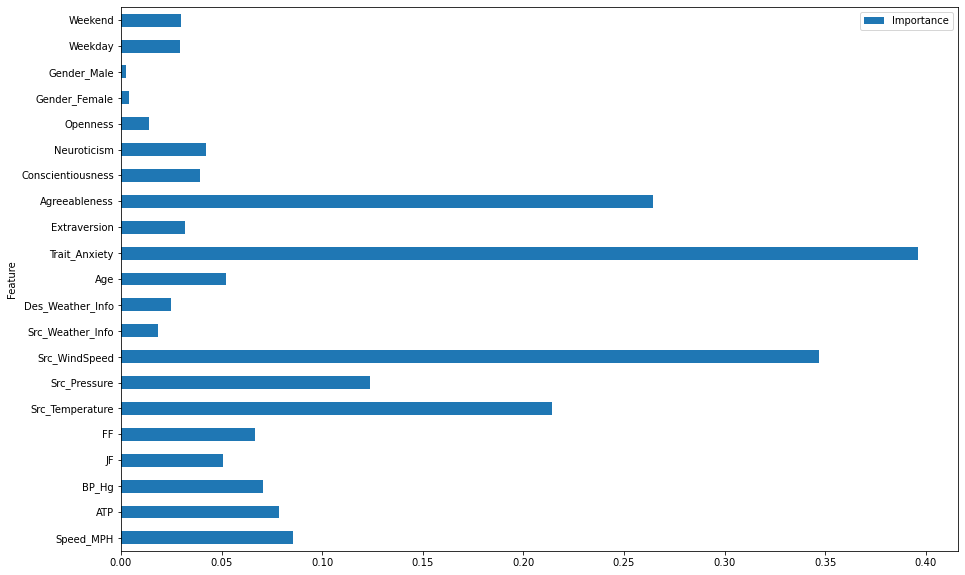

In [98]:
ax = final_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [99]:
normalized_df

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Src_Weather_Info,Des_Weather_Info,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
8906,0.207071,0.185714,0.764550,0.246125,0.269353,0.545894,0.666667,0.428808,0.25,0.5,...,0.590909,0.714286,1.000000,1.0,1.0,0.428571,1.0,0.0,1.0,0.0
8911,0.095960,0.219780,0.764550,0.221750,0.284720,0.545894,0.666667,0.428808,0.25,0.5,...,0.590909,0.714286,1.000000,1.0,1.0,0.428571,1.0,0.0,1.0,0.0
8912,0.222222,0.182418,0.764550,0.246125,0.269353,0.545894,0.666667,0.428808,0.25,0.5,...,0.590909,0.714286,1.000000,1.0,1.0,0.428571,1.0,0.0,1.0,0.0
8920,0.003367,0.185714,0.764550,0.311389,0.321687,0.545894,0.666667,0.428808,0.25,0.5,...,0.590909,0.714286,1.000000,1.0,1.0,0.428571,1.0,0.0,1.0,0.0
8933,0.033670,0.190110,0.764550,0.311389,0.321687,0.545894,0.666667,0.428808,0.25,0.5,...,0.590909,0.714286,1.000000,1.0,1.0,0.428571,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943464,0.154882,0.185348,0.780423,0.090909,0.571180,0.813299,0.809524,0.428808,0.25,0.5,...,0.000000,0.857143,0.666667,1.0,0.2,0.571429,0.0,1.0,0.0,1.0
1943469,0.202020,0.120879,0.780423,0.090909,0.571180,0.813299,0.809524,0.428808,0.25,0.5,...,0.000000,0.857143,0.666667,1.0,0.2,0.571429,0.0,1.0,0.0,1.0
1943473,0.151515,0.113736,0.780423,0.090909,0.571180,0.813299,0.809524,0.428808,0.25,0.5,...,0.000000,0.857143,0.666667,1.0,0.2,0.571429,0.0,1.0,0.0,1.0
1943479,0.045455,0.154396,0.780423,0.090909,0.571180,0.813299,0.809524,0.428808,0.25,0.5,...,0.000000,0.857143,0.666667,1.0,0.2,0.571429,0.0,1.0,0.0,1.0
